### PREDICTION USING DECISION TREE ALGORITHM by TITHI DEB

##### Explanation:
* Import the libraries.
* Load the datasets and describe the datasets and check null and unique values.
* Then we visualize the dataset features.
* Plot the graph and realtion b/w all the features.
* Analysis new features.
* Find relationship b/w new features based on class label.
* Clean the dataset by droping some of the columns.
* Separate test and train datasets.
* Build the model.
* Train the model and test it by the testing datasets.
* Validate trainning and testing datasets.
* Check the model by tetsing it with manual datasets rather than the given testing datasets.

##### IMPORT THE LIBRARIES

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### LOAD THE DATASETS

In [60]:
iris = pd.read_csv("Desktop\ML PROJECTS\Prediction Using Decision Tree Algorithm\Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
iris.shape

(150, 6)

In [62]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [63]:
# To Check Null Value
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [64]:
# to check Unique value
iris.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [65]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [66]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

##### VISUALIZING THE DATASET FEATURES 

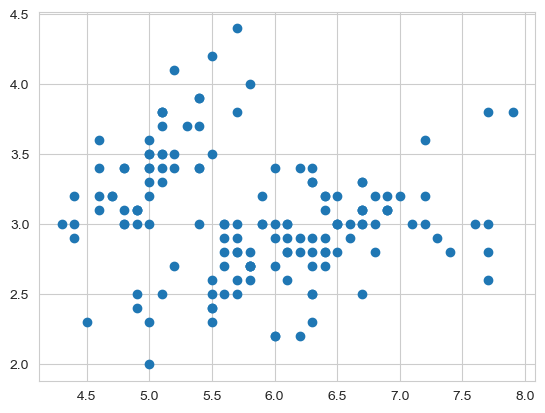

In [67]:
#Visualizing the dataset features to find pattern to solve our task

plt.scatter(iris['SepalLengthCm'],iris['SepalWidthCm'])
plt.show()

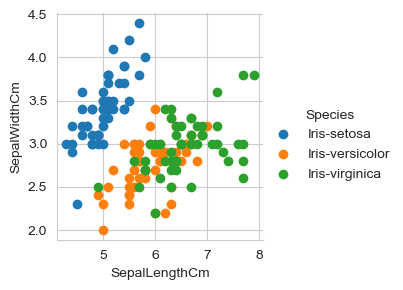

In [68]:
#Using Seaborn lib to visualized 2 features based on target variable.

sns.set_style('whitegrid')
sns.FacetGrid(iris, hue = 'Species') \
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
   .add_legend()

plt.show()

##### PLOT THE GRAPHS AND REALTIONSHIPS

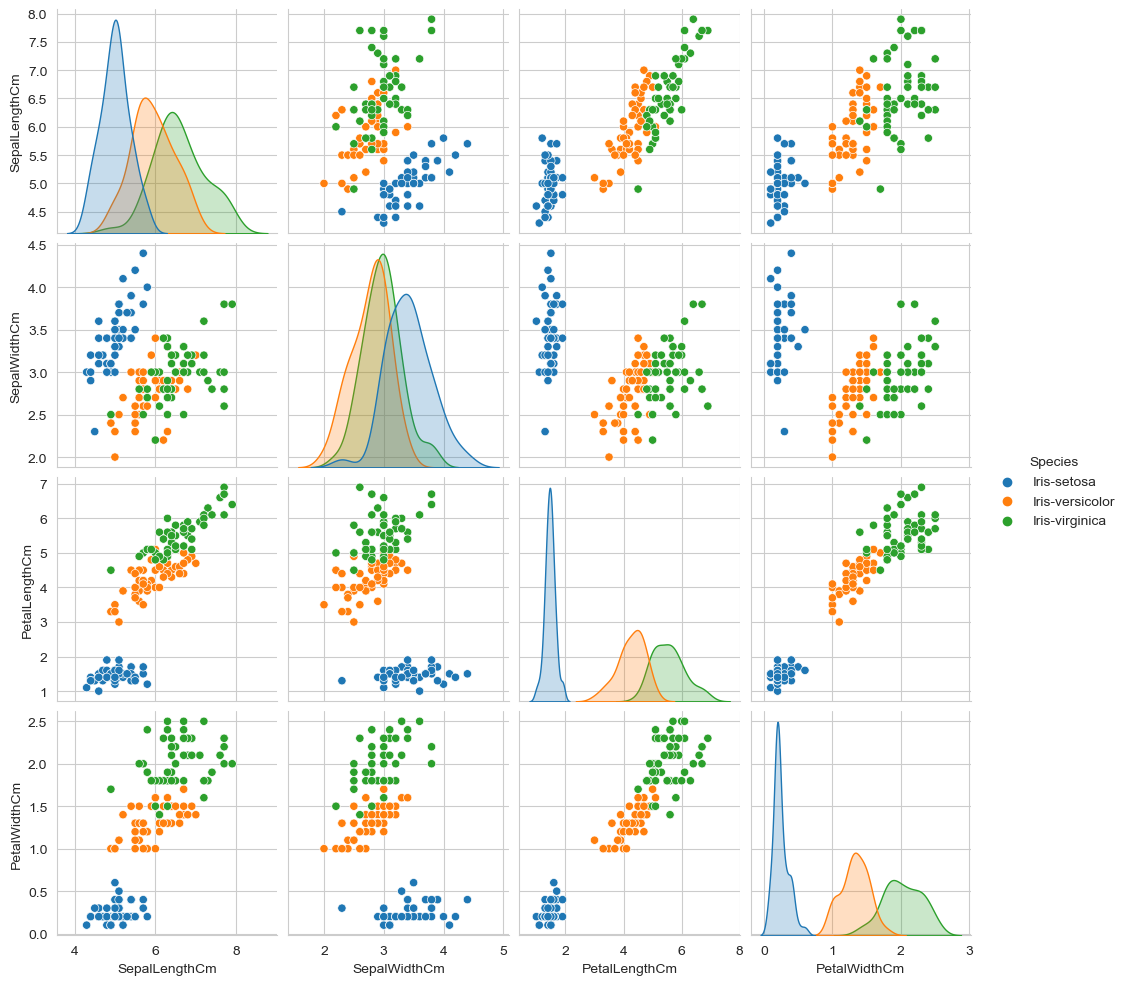

In [69]:
#Pair plot gives the relationship b/w all features distribution with each other..

sns.pairplot(iris.drop(['Id'],axis=1), hue='Species')
plt.show()

In [70]:
#Just trying to explore some new feature using the given data...

iris['Sepal_diff'] = iris['SepalLengthCm']-iris['SepalWidthCm']
iris['petal_diff'] = iris['PetalLengthCm']-iris['PetalWidthCm']
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2


##### ANALYSIZE THE DATA

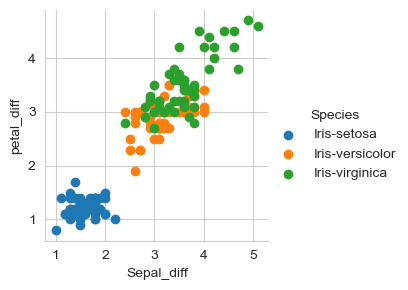

C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\s

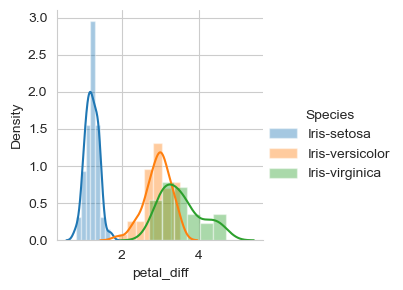

In [71]:
#Analysed new feature to get some more infomation apart form existing ones...

sns.set_style('whitegrid')
sns.FacetGrid(iris,hue='Species')\
   .map(plt.scatter,'Sepal_diff','petal_diff')\
   .add_legend()
plt.show()    


sns.set_style('whitegrid')
sns.FacetGrid(iris,hue='Species')\
   .map(sns.distplot,'petal_diff')\
   .add_legend()
plt.show() 

In [72]:
iris['Sepal_petal_len_diff'] = iris['SepalLengthCm']-iris['PetalLengthCm']
iris['Sepal_petal_width_diff'] = iris['SepalWidthCm']-iris['PetalWidthCm']
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4


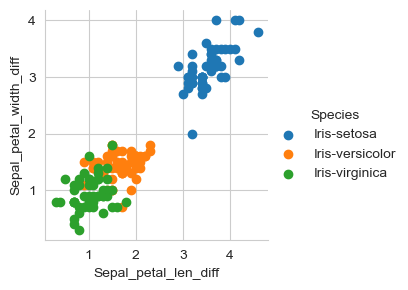

C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\s

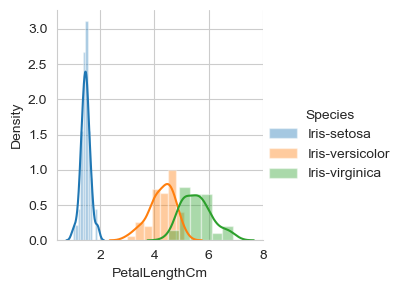

In [73]:
sns.set_style('whitegrid')
sns.FacetGrid(iris,hue='Species')\
   .map(plt.scatter,'Sepal_petal_len_diff','Sepal_petal_width_diff')\
   .add_legend()
plt.show()

sns.set_style('whitegrid')
sns.FacetGrid(iris,hue='Species')\
   .map(sns.distplot,'PetalLengthCm')\
   .add_legend()
plt.show()

In [74]:
iris['Sepal_petal_len_wid_diff'] = iris['SepalLengthCm']-iris['PetalWidthCm']
iris['Sepal_petal_wid_len_diff'] = iris['SepalWidthCm']-iris['PetalLengthCm']
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_petal_len_wid_diff,Sepal_petal_wid_len_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2


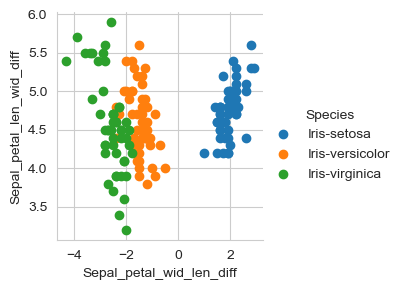

C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\s

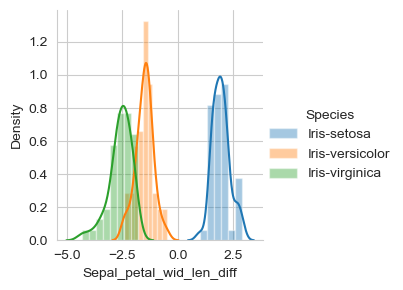

In [75]:
sns.set_style('whitegrid')
sns.FacetGrid(iris,hue='Species')\
   .map(plt.scatter,'Sepal_petal_wid_len_diff','Sepal_petal_len_wid_diff')\
   .add_legend()
plt.show()

sns.set_style('whitegrid')
sns.FacetGrid(iris,hue='Species')\
   .map(sns.distplot,'Sepal_petal_wid_len_diff')\
   .add_legend()
plt.show()

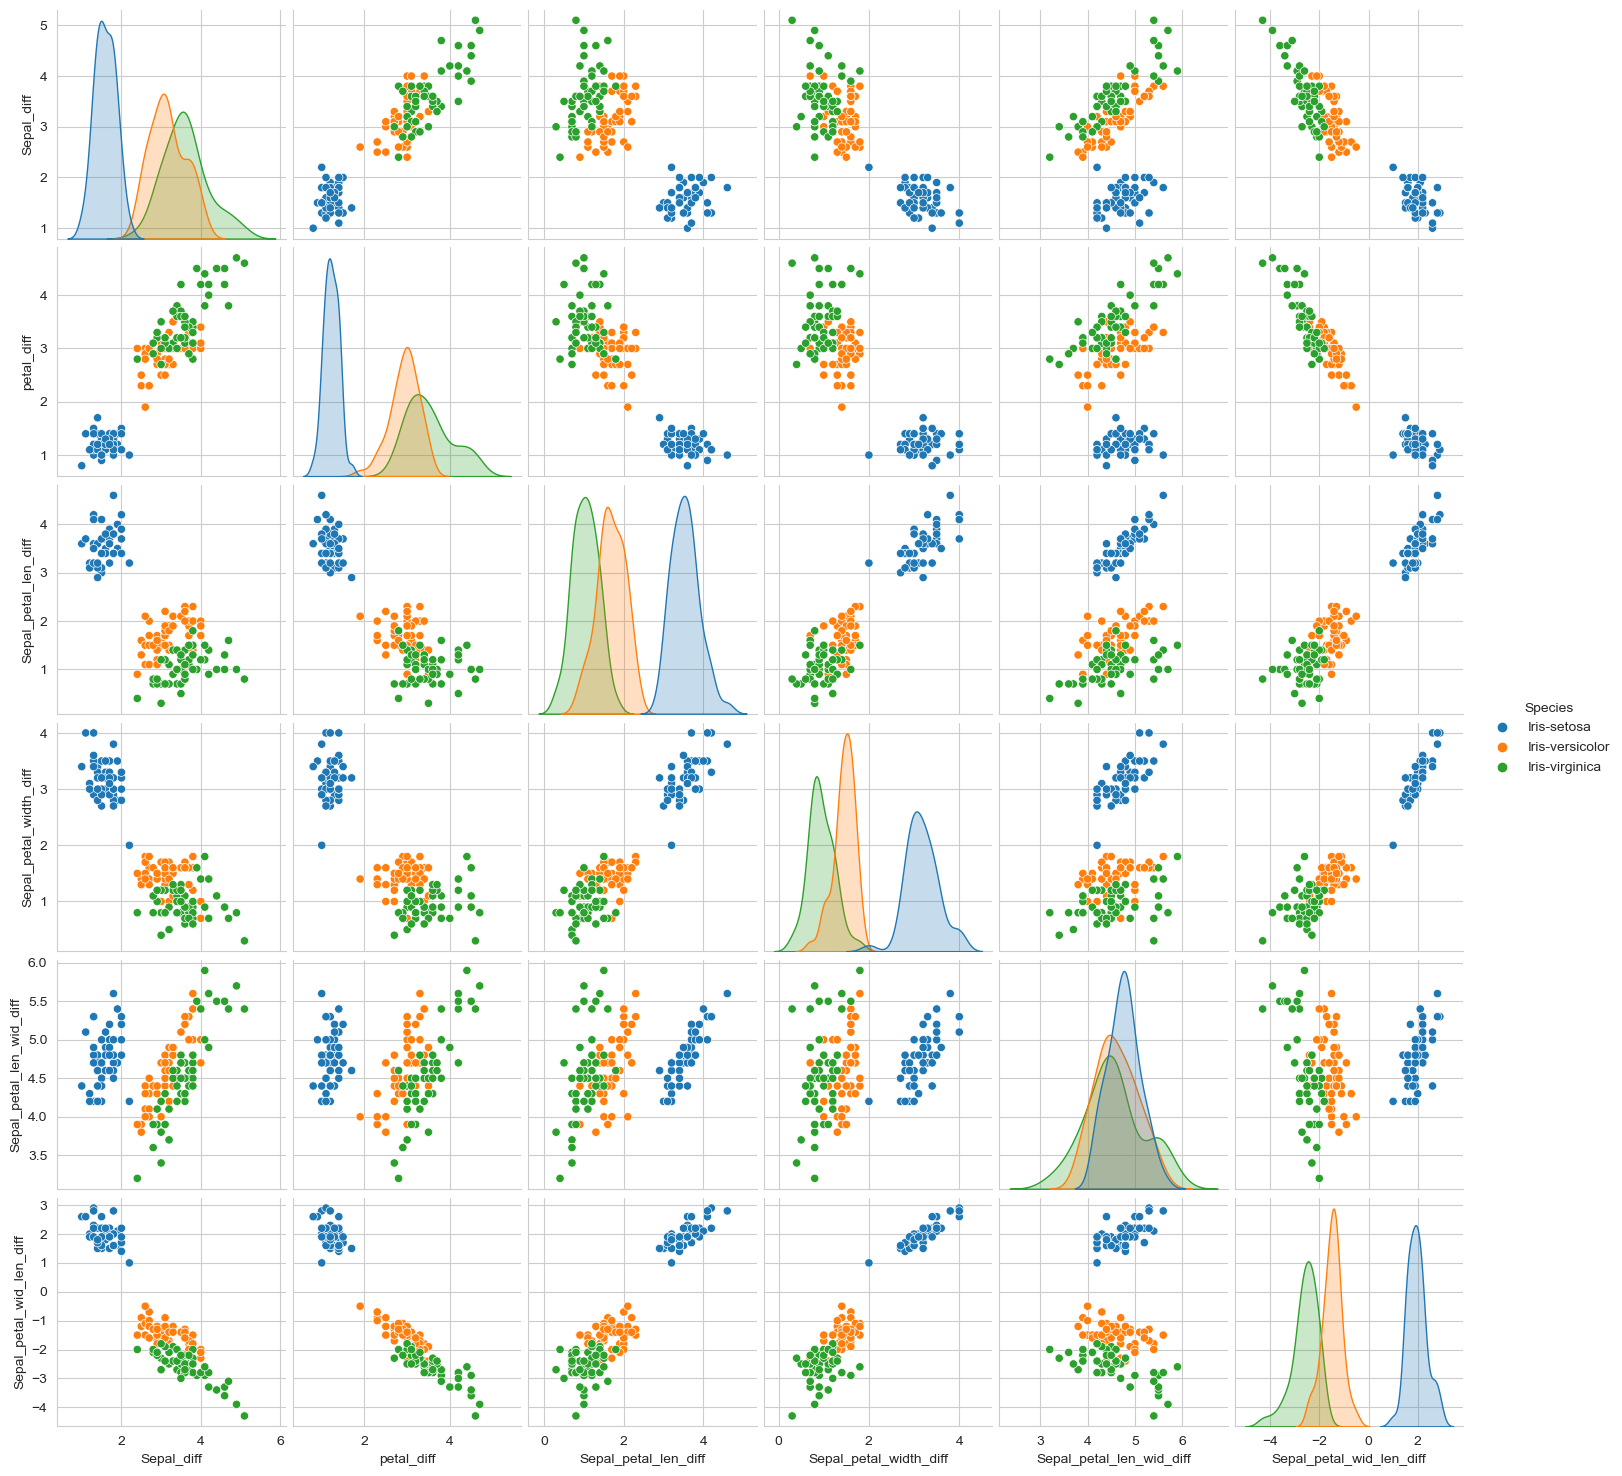

In [76]:
# Finding relationship b/w new feature based on class labels...

sns.pairplot(iris[['Species', 'Sepal_diff', 'petal_diff', 'Sepal_petal_len_diff',\
       'Sepal_petal_width_diff', 'Sepal_petal_len_wid_diff',\
       'Sepal_petal_wid_len_diff']], hue='Species')
plt.show()

##### DROPING SOME OF THE COLUMNS 

In [77]:
#Droping Id column as it is of no use in classifing the class labels..

iris.drop(['Id'],axis=1,inplace=True)

C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\s

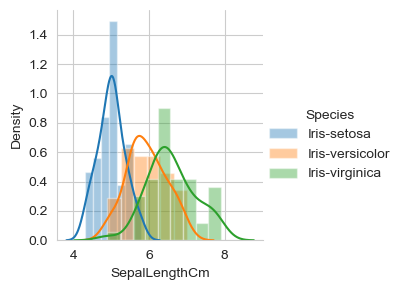

C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\s

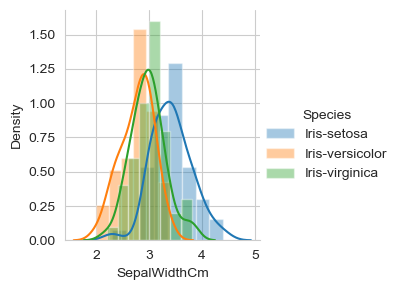

C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\s

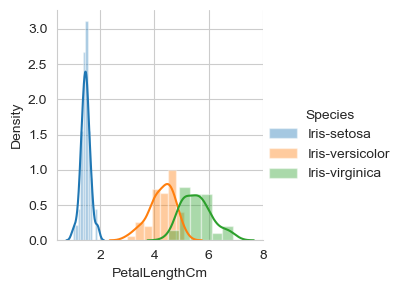

C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\s

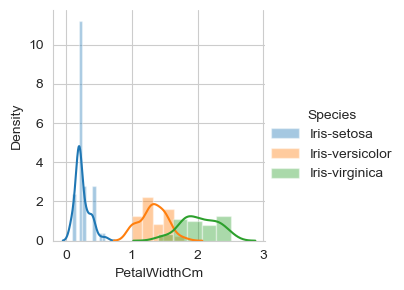

C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\s

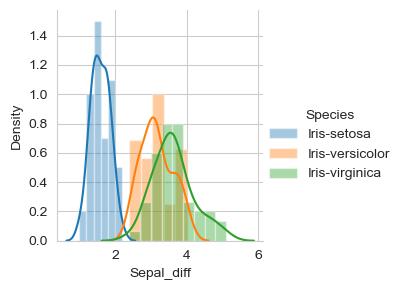

C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\s

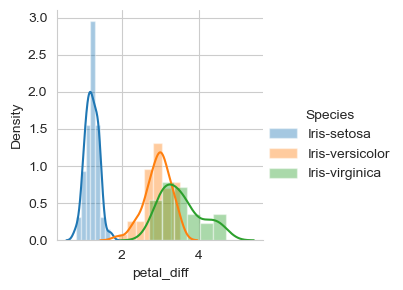

C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\s

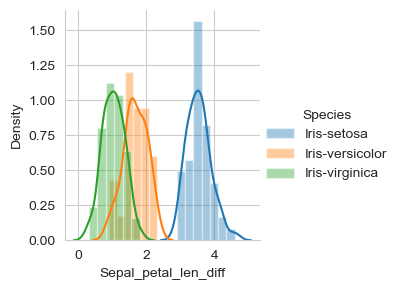

C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\s

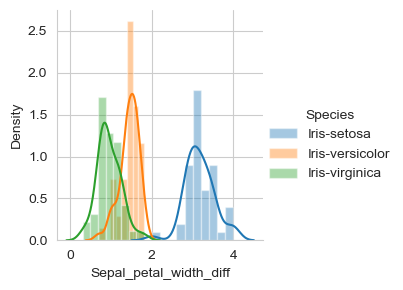

C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\s

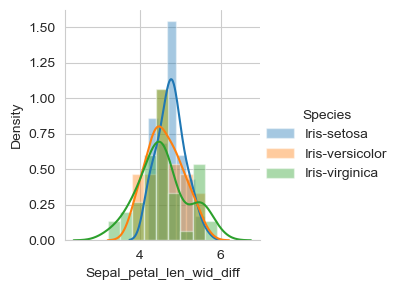

C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\tithi\anaconda3\lib\s

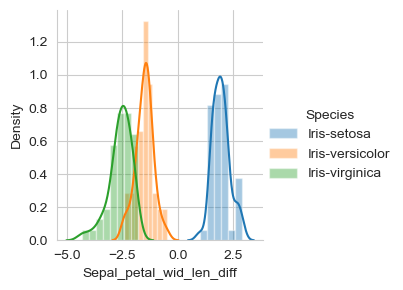

In [78]:
#exploring distribution plot for all features

for i in iris.columns:
    if i == 'Species':
        continue
    sns.set_style('whitegrid')
    sns.FacetGrid(iris,hue='Species')\
    .map(sns.distplot,i)\
    .add_legend()
    plt.show()

In [79]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [80]:
!pip install pydotplus
!apt-get install graphviz -y

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


##### BUILDING THE MODEL

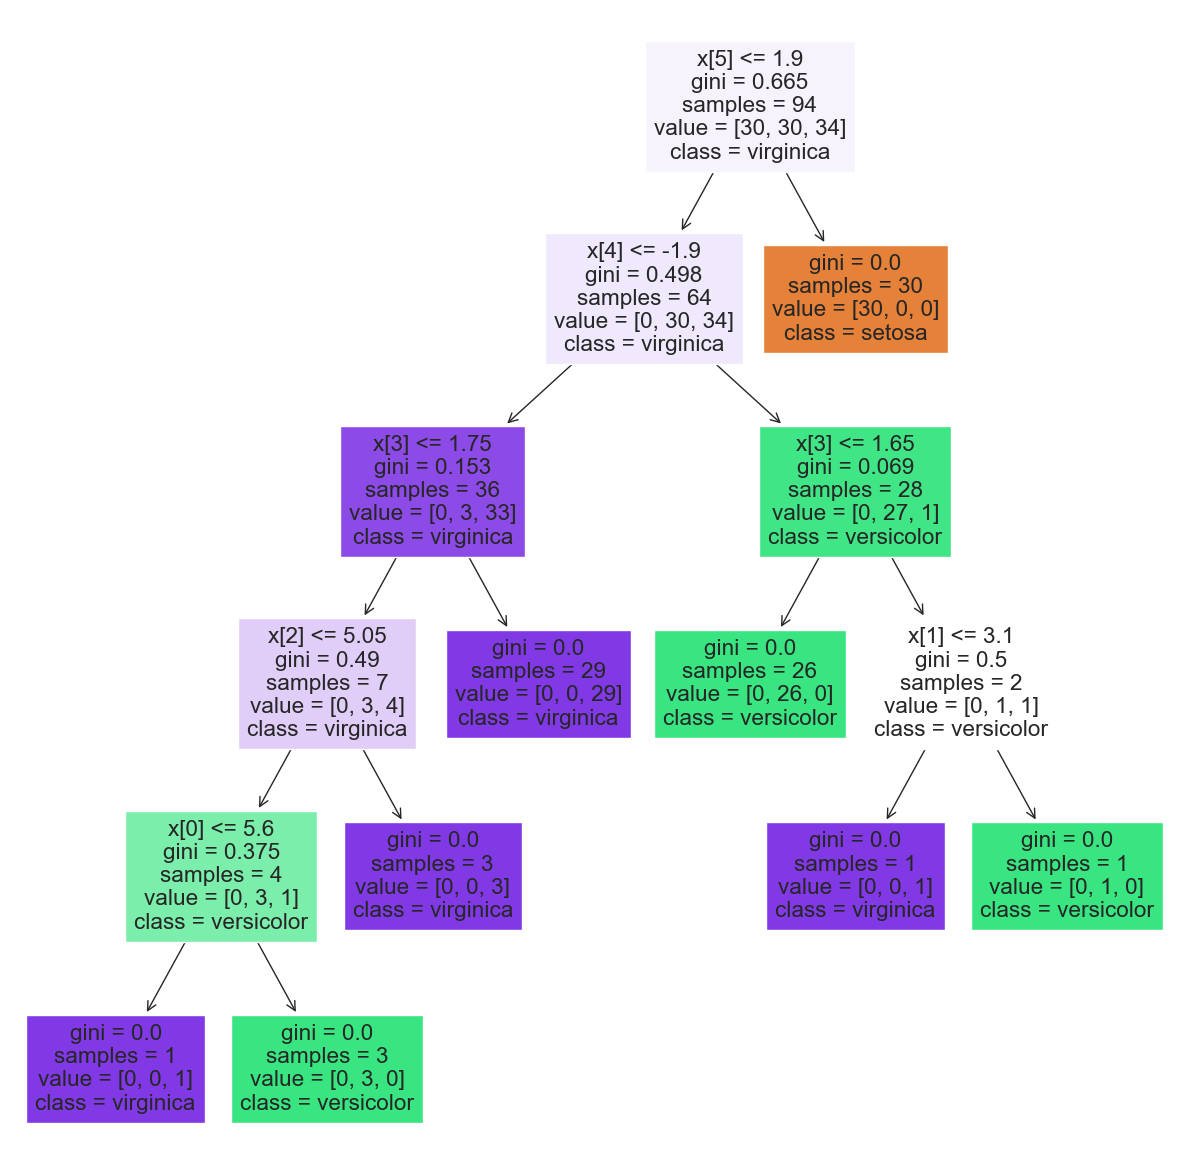

In [81]:
'''Imporing few library for create Decision tree classifier and visualizing the tree structure'''

from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score


'''Here we separating independent varibles or target varibles from Iris dataset'''


X = iris[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm','Sepal_petal_wid_len_diff','Sepal_petal_width_diff']]
y = iris['Species']


Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)


'''Now we have create a Decision tree classifier and trained it with training dataset.'''


Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt, Yt)

#Visualized the Tree which is formed on train dataset
plt.figure(figsize = (15,15))
classnames=['setosa', 'versicolor', 'virginica']
tree.plot_tree(Iris_clf, filled=True, class_names=classnames)
plt.show()

##### ACCURACY

In [82]:
print('Accuracy score is:',100*cross_val_score(Iris_clf, Xt, Yt, cv=3, scoring='accuracy').mean(),'%')

Accuracy score is: 90.4233870967742 %


In [83]:
#Checking validation test data on our trained model and getting performance metrices

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = Iris_clf.predict(Xcv)


print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 0.8181818181818182


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]], dtype=int64)

In [84]:
#Checking our model performance on actual unseen test data.. 
YT_hat = Iris_clf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]], dtype=int64)

##### TRAINNING

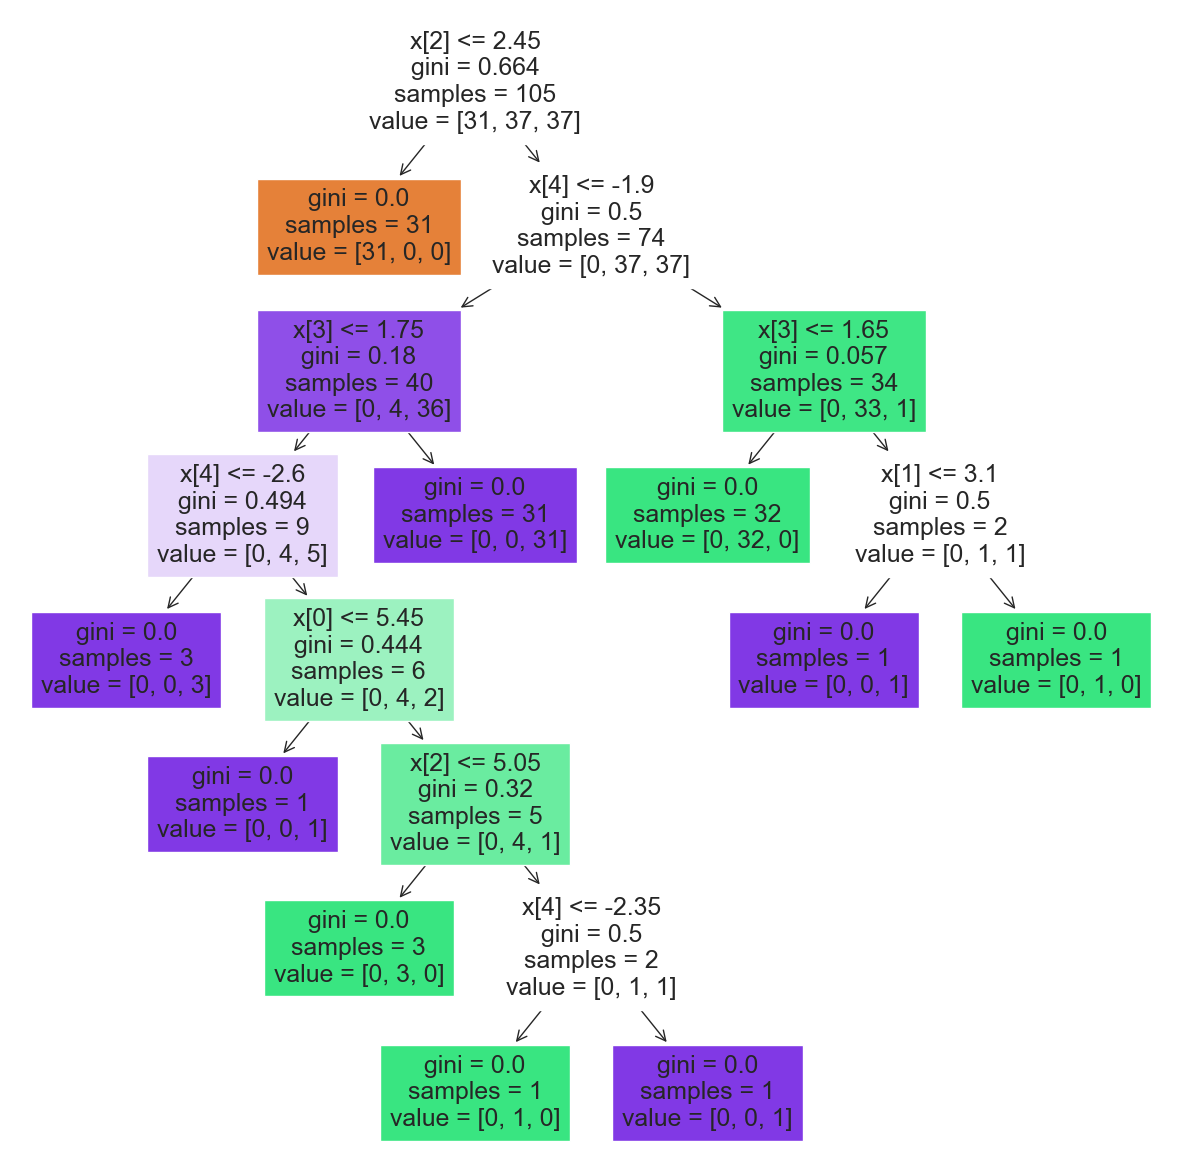

In [85]:
Iris_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_Fclf.fit(Xtrain, Ytrain)

#Visualize tree structure..
plt.figure(figsize = (15,15))
tree.plot_tree(Iris_Fclf, filled = True)
plt.show()

##### TESTING

In [86]:
YT_Fhat = Iris_Fclf.predict(Xtest)
YT_Fhat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]], dtype=int64)

##### TEST WITH MANUAL DATASETS

In [87]:
Test_point = [[5.4,3.0,4.5,1.5,-1.5,1.5],
             [6.5,2.8,4.6,1.5,-1.8,1.3],
             [5.1,2.5,3.0,1.1,-0.5,1.4],
             [5.1,3.3,1.7,0.5,1.6,2.8],
             [6.0,2.7,5.1,1.6,-2.4,1.1],
             [6.0,2.2,5.0,1.5,-2.8,0.7]]

print(Iris_Fclf.predict(Test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


C:\Users\tithi\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
